**Task 1: Determining Store Format**

To remedy the product surplus and shortages, the company wants to introduce different store formats. Each store format will have a different product selection in order to better match local demand. The actual building sizes will not change, just the product selection and internal layouts. The terms formats and segments will be used interchangeably throughout this project. You’ve been asked to:

    Determine the optimal number of store formats based on sales data.
        Sum sales data by StoreID and Year
        Use only 2015 sales data.
     
    Segment the 85 current stores into the different store formats.
    Use the StoreSalesData.csv files.

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [205]:
sales_data=pd.read_csv('storesalesdata.csv',dtype={'Month':np.object,'Day':np.object,'Year':np.object})
sales_data.dtypes

Store                   object
Day                     object
Month                   object
Year                    object
Dry_Grocery            float64
Dairy                  float64
Frozen_Food            float64
Meat                   float64
Produce                float64
Floral                 float64
Deli                   float64
Bakery                 float64
General_Merchandise    float64
dtype: object

In [206]:
sales_data.head(3)

,Store,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
0,S0001,01,03,2012,23401.06,5567.90,3930.28,5223.61,4542.28,238.58,2608.78,1651.77,4304.79
1,S0001,02,03,2012,32442.93,8009.52,4712.31,6174.72,9503.45,245.29,2692.72,2688.89,4467.51
2,S0001,03,03,2012,40433.61,9759.20,5969.03,8010.67,12793.92,282.12,3493.85,2929.85,5721.60


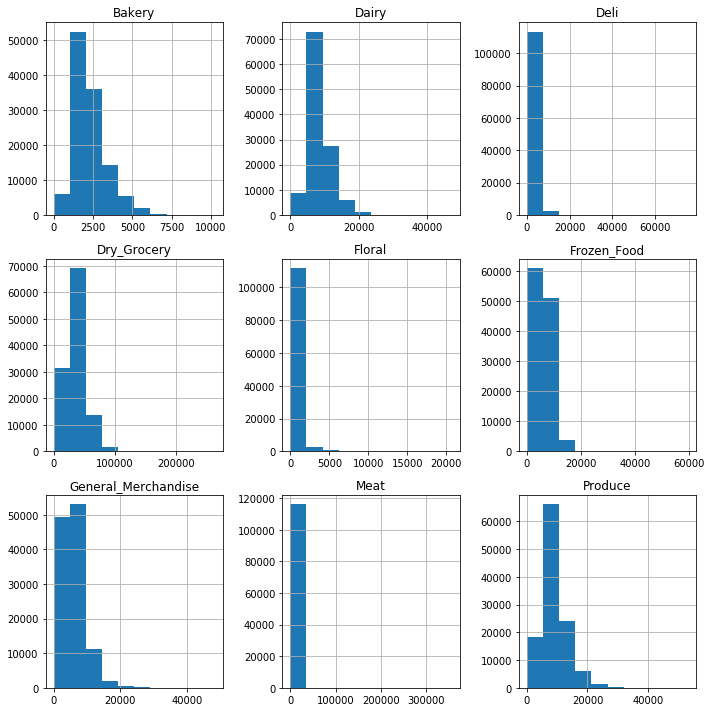

In [207]:
sales_data.hist(figsize=(10,10))
plt.tight_layout()

In [208]:
sales_data.isnull().sum()

Store                  0
Day                    0
Month                  0
Year                   0
Dry_Grocery            0
Dairy                  0
Frozen_Food            0
Meat                   0
Produce                0
Floral                 0
Deli                   0
Bakery                 0
General_Merchandise    0
dtype: int64

In [209]:
sales_data['Meat'].describe()

count    116232.000000
mean       9081.584935
std        4702.229928
min           0.000000
25%        5865.957500
50%        7905.615000
75%       11050.362500
max      355587.600000
Name: Meat, dtype: float64

In [210]:
year_sales=sales_data.loc[sales_data['Year']=='2015']
year_sales=year_sales.groupby(['Store','Year']).sum()
year_sales.head(3)

,,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,Year,,,,,,,,,
S0001,2015,10845787.65,2423389.38,1814872.88,2531382.34,2284388.70,159142.23,1023812.90,835599.06,1590570.68
S0002,2015,7931072.94,1844188.83,1366677.52,1991807.66,1755293.15,128935.92,689786.42,514864.68,1111992.45
S0003,2015,12741875.44,3095321.58,2087437.15,3468989.12,3792143.03,291259.69,1262874.27,1091930.44,2408831.27


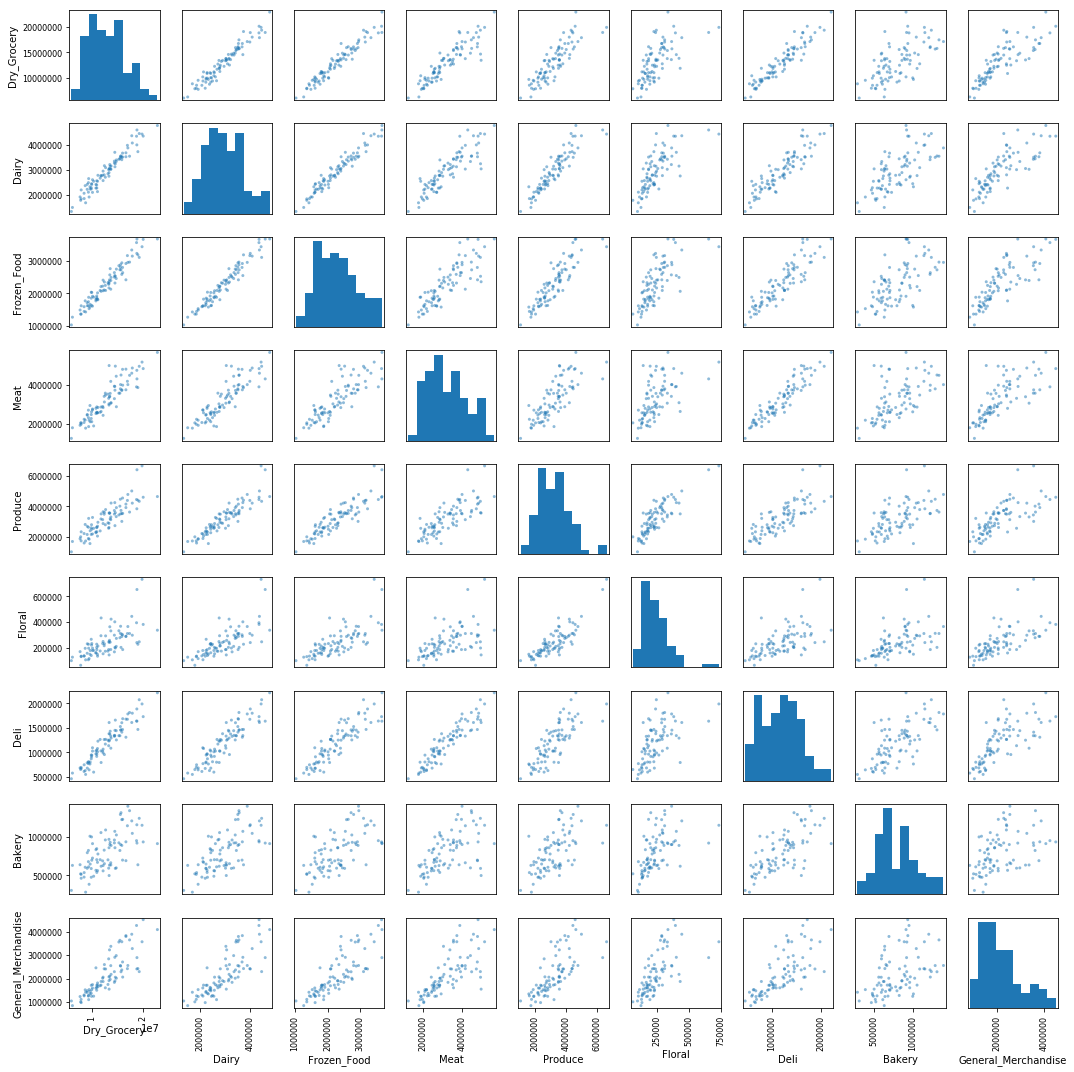

In [211]:
pd.plotting.scatter_matrix(year_sales,figsize=(15,15))
plt.tight_layout();

In [212]:
total_sales=year_sales.copy()
total_sales['Total_Sales']=year_sales[year_sales.columns].sum(axis=1)
total_sales.head(3)

,,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise,Total_Sales
Store,Year,,,,,,,,,,
S0001,2015,10845787.65,2423389.38,1814872.88,2531382.34,2284388.70,159142.23,1023812.90,835599.06,1590570.68,23508945.82
S0002,2015,7931072.94,1844188.83,1366677.52,1991807.66,1755293.15,128935.92,689786.42,514864.68,1111992.45,17334619.57
S0003,2015,12741875.44,3095321.58,2087437.15,3468989.12,3792143.03,291259.69,1262874.27,1091930.44,2408831.27,30240661.99


In [213]:
def getPercentage(row):
     #return (row/row['Total_Sales'])
        return (row/row['Total_Sales'])*100
    
perc_sales=total_sales.apply(getPercentage,axis=1)
#perc_sales['Total_Sales']=total_sales['Total_Sales']
perc_sales.reset_index(drop=True,inplace=True,level=1)
perc_sales.drop('Total_Sales',inplace=True,axis=1)
perc_sales.head(3)

,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0001,46.134726,10.308371,7.719925,10.767741,9.717104,0.676943,4.354993,3.554388,6.765810
S0002,45.752795,10.638761,7.884093,11.490345,10.125940,0.743806,3.979242,2.970153,6.414865
S0003,42.134909,10.235628,6.902750,11.471274,12.539881,0.963139,4.176080,3.610802,7.965537


new_stores=store_data.loc[store_data['Type']=='New']

### Skip scaling below

In [214]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_year_sales=scaler.fit_transform(year_sales)

columns=year_sales.columns.values
scaled_year_sales = pd.DataFrame(scaled_year_sales, columns=columns)
display(scaled_year_sales.head(3))

,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
0,-0.611668,-0.704891,-0.772656,-0.738369,-0.908461,-0.744731,-0.426171,0.138940,-0.669241
1,-1.430315,-1.466001,-1.507753,-1.300164,-1.433177,-1.020229,-1.272212,-1.147970,-1.226188
2,-0.079120,0.178075,-0.325617,0.237849,0.586811,0.460250,0.179337,1.167441,0.283014


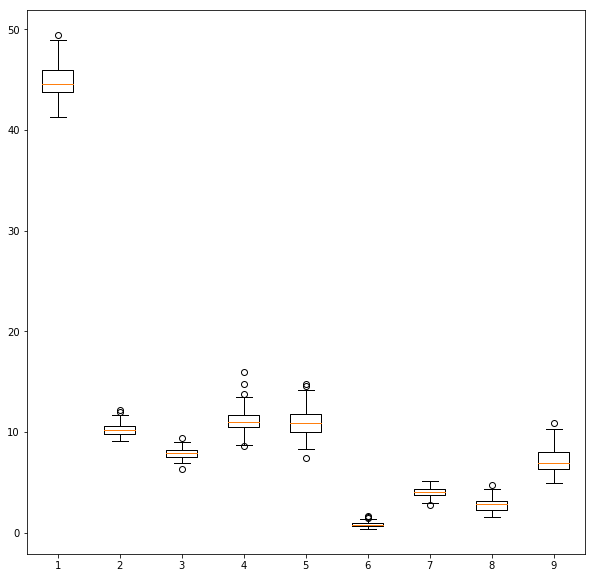

In [215]:
plt.figure(figsize=(10,10))
plt.boxplot(perc_sales.values);

In [216]:
def getOutliers(data):
    for column in data:
        q3,q1= np.percentile(data[column],[75,25])
        IQR=q3-q1
        step=IQR*1.5
        lower_f=q1-step
        upper_f=q3+step
        print(column)
        outlierlist=data.loc[~((data[column]>=lower_f)&(data[column]<=upper_f)) ]
        if not outlierlist.empty:
            display(outlierlist)
        else: print('No Outliers')
getOutliers(perc_sales)

Dry_Grocery


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0036,49.445838,9.468008,8.03418,10.070383,9.808692,0.581731,3.057839,1.588227,7.945101


Dairy


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0021,43.283323,12.218983,8.645293,8.619789,14.800300,0.895074,3.657883,2.816566,5.062788
S0078,43.148155,11.966056,8.805176,11.185710,12.732869,0.719257,3.627363,2.520940,5.294475


Frozen_Food


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0072,43.970957,9.278848,6.337343,12.556380,10.896989,0.755870,4.405620,1.820136,9.977856
S0084,46.030597,10.634346,9.440844,10.593586,10.082424,0.637733,4.014954,2.211860,6.353656


Meat


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0021,43.283323,12.218983,8.645293,8.619789,14.800300,0.895074,3.657883,2.816566,5.062788
S0039,45.266271,10.901897,7.402243,13.761896,7.394848,0.690329,3.552706,4.730447,6.299361
S0057,43.812358,9.721763,7.532914,14.744643,10.727042,0.586651,4.953605,1.770737,6.150287
S0075,43.112685,9.776211,7.550269,15.921834,11.449991,0.455906,5.156783,1.603118,4.973201


Produce


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0021,43.283323,12.218983,8.645293,8.619789,14.800300,0.895074,3.657883,2.816566,5.062788
S0039,45.266271,10.901897,7.402243,13.761896,7.394848,0.690329,3.552706,4.730447,6.299361
S0050,43.025178,10.480019,8.316922,9.754826,14.526272,1.489088,3.721670,2.097186,6.588839


Floral


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0027,44.668473,10.403012,7.764256,9.939019,13.224450,1.625443,2.972283,2.337046,7.066017
S0050,43.025178,10.480019,8.316922,9.754826,14.526272,1.489088,3.721670,2.097186,6.588839
S0052,42.364873,9.450747,7.279375,10.931703,14.125294,1.562618,4.229769,2.453848,7.601774


Deli


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0056,47.638955,11.687238,8.639925,8.743182,11.79223,0.810747,2.71587,2.24774,5.724114


Bakery


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0039,45.266271,10.901897,7.402243,13.761896,7.394848,0.690329,3.552706,4.730447,6.299361


General_Merchandise


,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Store,,,,,,,,,
S0014,44.437327,9.776808,7.718514,9.869683,10.684908,1.065968,3.492664,2.05489,10.899237


In [217]:
#There appears to  be no real need to remove outliers based on consistency 
#log_year_sales=log_year_sales.drop(outlierlist.index.values,axis=0)

#JUST IN CASE:
#log_year_sales=log_year_sales.drop(['S0036','S0028','S0052'],axis=0)

In [218]:
from sklearn.decomposition import PCA
def getPca(data,n_components,b_plot):
    pca=PCA(n_components)
    pca.fit(data)
    pca_res=pca.transform(data)
    col_list=[]
    for i in range(n_components):
        #string='Dimension '+ i
        col_list.append('Dimension '+str(i))
    reduced_data= pd.DataFrame(pca_res, columns = col_list)    
    
    if(b_plot==True):
        fig = plt.figure(figsize=(15,4))
        ax = fig.add_subplot(111)
        plt.plot(pca.explained_variance_)
        for i, ev in enumerate(pca.explained_variance_ratio_):
            ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

        plt.tight_layout()
        plt.show()
    return reduced_data

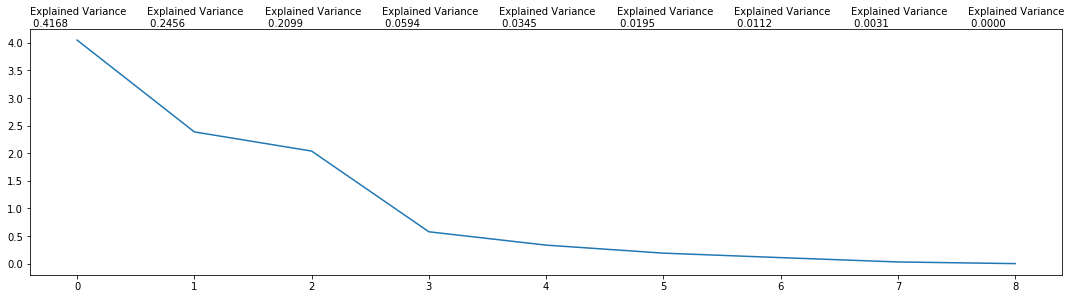

,Dimension 0,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,1.702141,-0.728169,-0.180049,0.847645,-0.465804,0.107205,0.211132,-0.064141,1.252311e-14
1,1.142339,-1.041185,0.276626,0.268944,0.306592,0.207492,0.192314,0.075945,1.035594e-14
2,-2.993852,0.940686,0.902460,0.280088,-0.862958,0.553366,0.263041,-0.078434,3.758053e-15


In [219]:
reduced_perc_sales=getPca(perc_sales,9,True)
display(reduced_perc_sales.head(3))

In [220]:
import matplotlib
def biplot(good_data,reduced_data,pca):

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 0'], y=reduced_data.loc[:, 'Dimension 1'],
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 0", fontsize=14)
    ax.set_ylabel("Dimension 1", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

## Below is the PCA biplot comparison between actual data vs scaled vs percentage

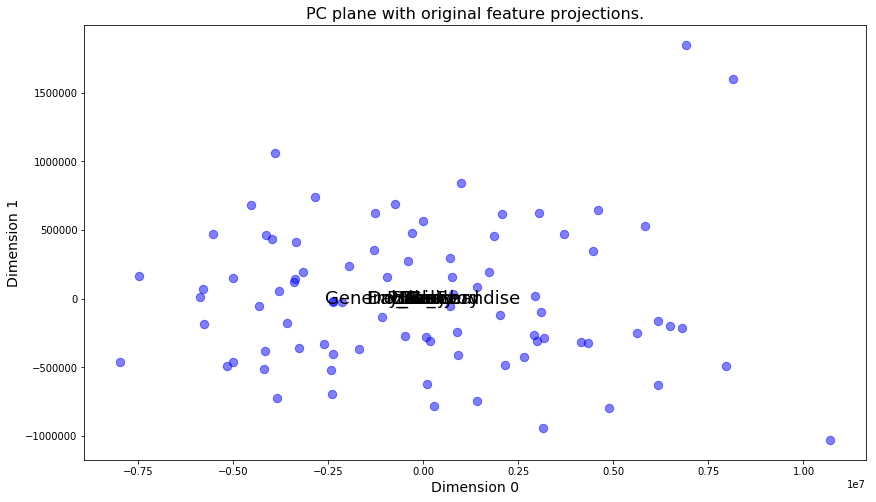

In [221]:
reduced_perc_sales=getPca(year_sales,2,False)
biplot(year_sales,reduced_perc_sales,pca)

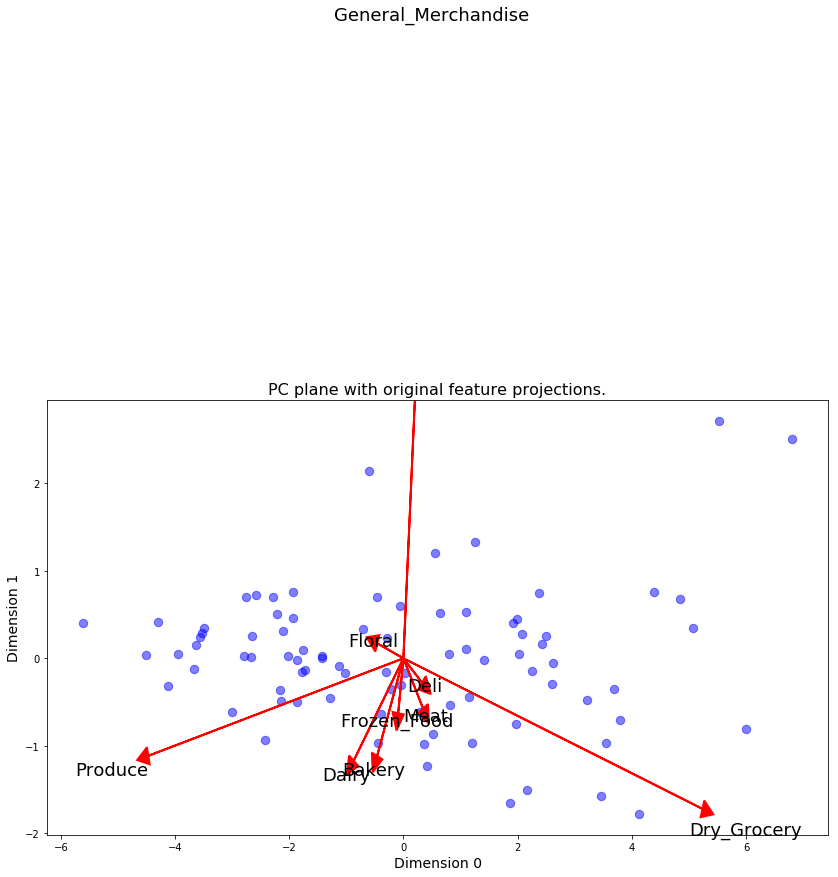

In [222]:
reduced_year_sales=getPca(scaled_year_sales,2,False)
biplot(scaled_year_sales,reduced_year_sales,pca)

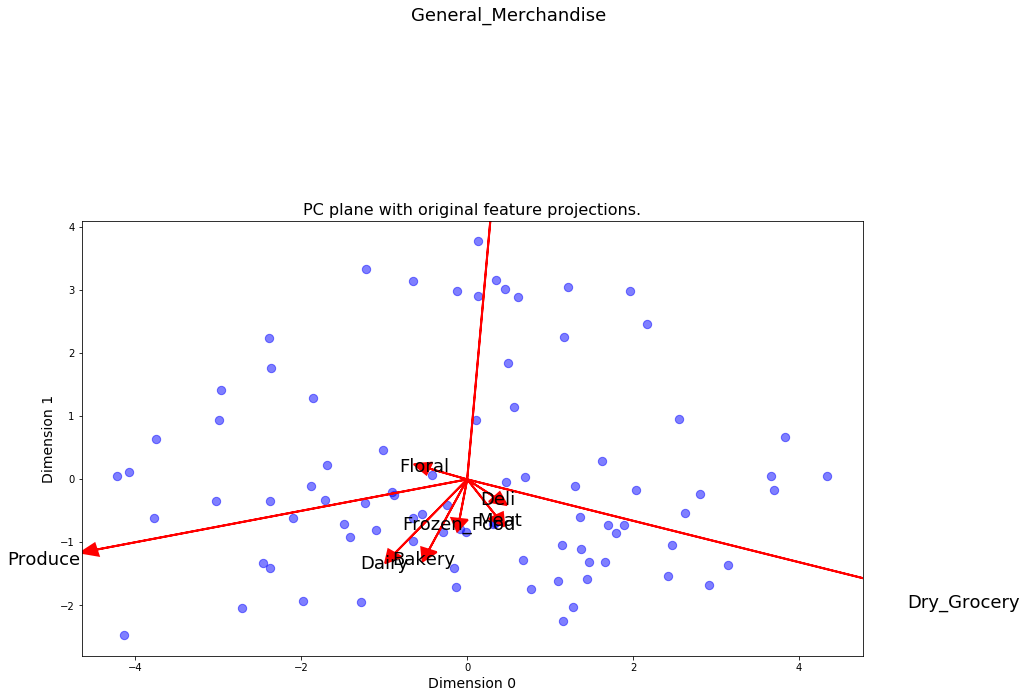

In [223]:
reduced_perc_sales=getPca(perc_sales,2,False)
biplot(perc_sales,reduced_perc_sales,pca)

**CLUSTERING**

In [224]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabaz_score,silhouette_score

def cluster_Kmeans(data,n_clusters):
    clusterer=KMeans(n_clusters=n_clusters,n_init=3)
   # clusterer=GaussianMixture(n_clusters=n_clusters,n_init=3,random_state=6)
    clusterer.fit(data)
    labels=clusterer.labels_
    sh_score=silhouette_score(data,labels)
    ch_score=calinski_harabaz_score(data,labels)
    print(n_clusters, 'Silhouette:', sh_score, 'CH score:', ch_score)
    return labels

def pred_Kmeans(data,n_clusters):
    clusterer=KMeans(n_clusters=n_clusters,n_init=3)
   # clusterer=GaussianMixture(n_clusters=n_clusters,n_init=3,random_state=6)
    clusterer.fit(data)
    pred=clusterer.predict(data)
    centers=clusterer.cluster_centers_ 
    return pred,centers

In [226]:
for i in range(2,12):
    cluster_Kmeans(scaled_year_sales,i)

2 Silhouette: 0.44533068381600316 CH score: 104.85029937075196
3 Silhouette: 0.37541968996660163 CH score: 88.35032429964372
4 Silhouette: 0.2668937758974213 CH score: 74.16481331859677
5 Silhouette: 0.2655022924649996 CH score: 66.01451794091471
6 Silhouette: 0.2531168396814684 CH score: 64.38850251084277
7 Silhouette: 0.2733110502160561 CH score: 61.77830210573288
8 Silhouette: 0.2797122636033464 CH score: 58.91279290115711
9 Silhouette: 0.26578672484518606 CH score: 56.344131441010916
10 Silhouette: 0.21091078112880135 CH score: 50.66789912118902
11 Silhouette: 0.24144201025055217 CH score: 49.75090066233554


In [227]:
for i in range(2,12):
    cluster_Kmeans(reduced_year_sales,i)

2 Silhouette: 0.5298908106609367 CH score: 146.86168481435573
3 Silhouette: 0.48898924281456796 CH score: 145.3266680383252
4 Silhouette: 0.4080536965581845 CH score: 139.36018252126007
5 Silhouette: 0.4088504283143915 CH score: 137.53332799624167
6 Silhouette: 0.421595283865394 CH score: 149.2446752447628
7 Silhouette: 0.42642761394323214 CH score: 150.29321045868357
8 Silhouette: 0.43318136525092815 CH score: 153.21148009911158
9 Silhouette: 0.4311183757699982 CH score: 154.73340050424073
10 Silhouette: 0.4552207574636854 CH score: 156.59935662940077
11 Silhouette: 0.4347663635960277 CH score: 158.72500376858946


In [228]:
for i in range(2,12):
    cluster_Kmeans(perc_sales,i)

2 Silhouette: 0.24735189330078564 CH score: 32.57687015734145
3 Silhouette: 0.28889429281696494 CH score: 34.223459168887054
4 Silhouette: 0.2625894695608342 CH score: 31.668636673546533
5 Silhouette: 0.2630739929151472 CH score: 27.799588008109723
6 Silhouette: 0.24614251718634433 CH score: 25.61724270887247
7 Silhouette: 0.22032925903355108 CH score: 25.491098207149033
8 Silhouette: 0.22052265078273012 CH score: 24.77379959347017
9 Silhouette: 0.24300280284600237 CH score: 25.19754771536605
10 Silhouette: 0.22873232416239905 CH score: 23.90345239070586
11 Silhouette: 0.20520810470036943 CH score: 22.536154228053746


In [229]:
for i in range(2,12):
    cluster_Kmeans(reduced_perc_sales,i)

2 Silhouette: 0.3645289466313209 CH score: 58.60188855429568
3 Silhouette: 0.4652653095390222 CH score: 87.5089437174042
4 Silhouette: 0.4081799325888592 CH score: 91.0608424675399
5 Silhouette: 0.3882093479589532 CH score: 89.17554859588762
6 Silhouette: 0.3934695118854877 CH score: 91.33047974797151
7 Silhouette: 0.39031254065378757 CH score: 84.88643770664792
8 Silhouette: 0.3645163408819371 CH score: 86.35576794520478
9 Silhouette: 0.3639798378027045 CH score: 83.48829152317715
10 Silhouette: 0.36191861623239685 CH score: 90.60725490388175
11 Silhouette: 0.39499141830649487 CH score: 99.01672706868014


In [230]:
for i in range(2,12):
    cluster_Kmeans(np.log(perc_sales),i)

2 Silhouette: 0.221973386083474 CH score: 28.791867030105617
3 Silhouette: 0.2390537686641453 CH score: 29.811227925815945
4 Silhouette: 0.2083453508211995 CH score: 26.169143413275204
5 Silhouette: 0.21061456831000977 CH score: 25.02366814341048
6 Silhouette: 0.24264319889412997 CH score: 25.527137604177334
7 Silhouette: 0.2169072969682105 CH score: 24.40204021260136
8 Silhouette: 0.22734436894100127 CH score: 24.22592147744402
9 Silhouette: 0.23078215617693498 CH score: 23.26180391058113
10 Silhouette: 0.22712093801960684 CH score: 21.355884681215223
11 Silhouette: 0.18783000348268544 CH score: 20.719145620437573


In [277]:
labels=cluster_Kmeans(scaled_year_sales,3)
perc_result=scaled_year_sales.copy()
perc_result['labels']=labels
print(perc_result['labels'].value_counts())

3 Silhouette: 0.3279278812330178 CH score: 87.58992289827282
1    33
0    27
2    25
Name: labels, dtype: int64


In [279]:
labels=cluster_Kmeans(reduced_year_sales,3)
perc_result=scaled_year_sales.copy()
perc_result['labels']=labels
print(perc_result['labels'].value_counts())

3 Silhouette: 0.48898924281456796 CH score: 145.32666803832527
0    37
2    36
1    12
Name: labels, dtype: int64


In [282]:
labels=cluster_Kmeans(perc_sales,3)
perc_result=perc_sales.copy()
perc_result['labels']=labels
print(perc_result['labels'].value_counts())

3 Silhouette: 0.28769908688226165 CH score: 34.09884017757048
1    36
0    34
2    15
Name: labels, dtype: int64


In [281]:
labels=cluster_Kmeans(reduced_perc_sales,3)
perc_result=perc_sales.copy()
perc_result['labels']=labels
print(perc_result['labels'].value_counts())

3 Silhouette: 0.4652653095390222 CH score: 87.5089437174042
1    36
0    34
2    15
Name: labels, dtype: int64


In [283]:
import matplotlib.cm as cm
def cluster_res(data,preds,centers):
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, data], axis = 1)

    fig, ax = plt.subplots(figsize = (14,8))

    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
           cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 0', y = 'Dimension 1', \
           color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

# Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                  alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);
    

    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


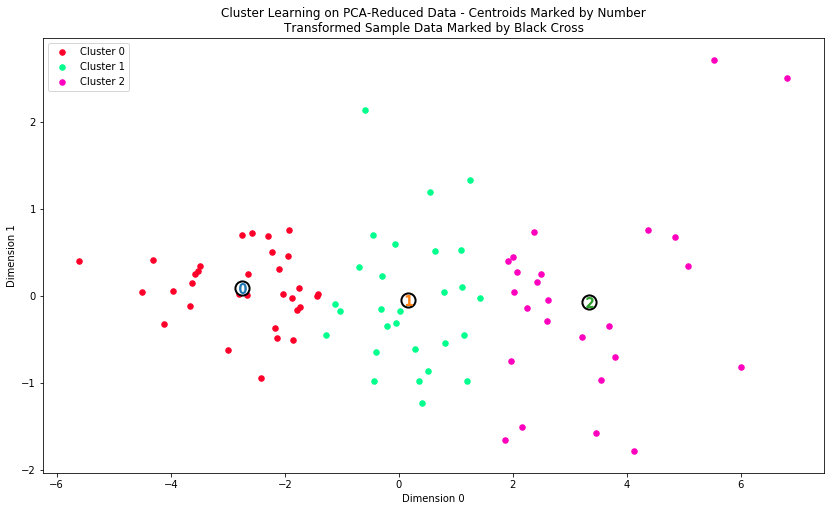

In [284]:
pred_res,center=pred_Kmeans(reduced_year_sales,3)
cluster_res(reduced_year_sales,pred_res,center)

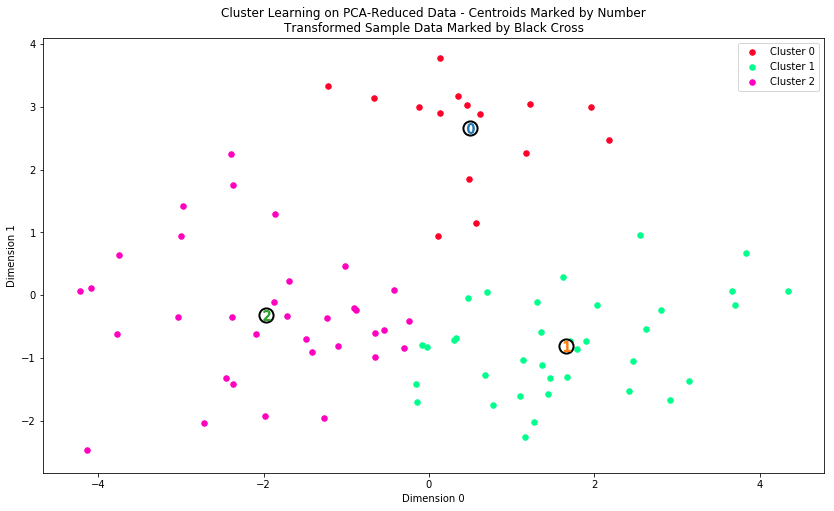

In [285]:
pred_res,center=pred_Kmeans(reduced_perc_sales,3)
cluster_res(reduced_perc_sales,pred_res,center)

In [291]:
def cluster_GM(data,n_clusters):
    clusterer = GaussianMixture(n_components=n_clusters)
   # clusterer=GaussianMixture(n_clusters=n_clusters,n_init=3,random_state=6)
    clusterer.fit(data)
    preds = clusterer.predict(data)
    sh_score=silhouette_score(data,preds)
    ch_score=calinski_harabaz_score(data,preds)
    aic=clusterer.aic(data)
    print(n_clusters, 'Silhouette:', sh_score, 'CH score:', ch_score,'AIC', aic)
    return labels

def pred_GM(data,n_clusters):
    clusterer = GaussianMixture(n_components=n_clusters)
   # clusterer=GaussianMixture(n_clusters=n_clusters,n_init=3,random_state=6)
    clusterer.fit(data)
    pred=clusterer.predict(data)
    centers=clusterer.means_ 
    return pred,centers

In [292]:
for i in range(2,12):
    cluster_GM(scaled_year_sales,i)

2 Silhouette: 0.3663142682640594 CH score: 75.7176679753754 AIC 845.083593127847
3 Silhouette: 0.32014624498350164 CH score: 69.06623143974583 AIC 788.3348266015765
4 Silhouette: 0.23278580960846648 CH score: 55.18530172366477 AIC 647.682470410743
5 Silhouette: 0.1864109148981125 CH score: 49.734976474925 AIC 708.3226432187703
6 Silhouette: 0.22602554024662838 CH score: 57.40833004755527 AIC 792.1420426051252
7 Silhouette: 0.2612781245469673 CH score: 60.90610194788315 AIC 516.9274615347274
8 Silhouette: 0.2543017532367993 CH score: 51.86146846369525 AIC 388.84366408379304
9 Silhouette: 0.21822988857799874 CH score: 39.97370903111614 AIC 0.4068773342978602
10 Silhouette: 0.2377819402243889 CH score: 49.99632891025895 AIC -166.19040903619202
11 Silhouette: 0.2161654068658225 CH score: 48.88698143504447 AIC -405.7153704237021


In [293]:
for i in range(2,12):
    cluster_GM(reduced_year_sales,i)

2 Silhouette: 0.5041071143266568 CH score: 133.19847701794086 AIC 597.8215202938269
3 Silhouette: 0.46798928080164337 CH score: 121.37212379163333 AIC 594.4464134347202
4 Silhouette: 0.314433763303596 CH score: 103.82392555325464 AIC 597.1214262826113
5 Silhouette: 0.39160672083051223 CH score: 115.9958516150624 AIC 598.9493936548238
6 Silhouette: 0.4301926237489788 CH score: 152.56055317004822 AIC 590.5065805293594
7 Silhouette: 0.42656773049614094 CH score: 141.5665694132272 AIC 578.7939368891525
8 Silhouette: 0.35796401842809467 CH score: 113.64882081734991 AIC 581.0334922444879
9 Silhouette: 0.397554618287315 CH score: 133.99965369914005 AIC 584.538503627139
10 Silhouette: 0.4402993906243541 CH score: 152.8384371049568 AIC 590.2255784905868
11 Silhouette: 0.3361916671350408 CH score: 101.25845195392066 AIC 545.7199975357375


In [294]:
for i in range(2,12):
    cluster_GM(perc_sales,i)

2 Silhouette: 0.07565461460784602 CH score: 9.222254807651863 AIC 479.37234218761984
3 Silhouette: 0.2274792304602073 CH score: 26.934683340242863 AIC 484.2327685397703
4 Silhouette: 0.20944154646193977 CH score: 24.266435962809147 AIC 487.26900018222
5 Silhouette: 0.1987752909268624 CH score: 23.813190681944185 AIC 460.85613519207357
6 Silhouette: 0.2058714885285222 CH score: 24.003422880251684 AIC 355.27131126180666
7 Silhouette: 0.22683238285342572 CH score: 24.39772109170136 AIC 217.32276858625153
8 Silhouette: 0.17933397574272503 CH score: 21.208350997744205 AIC 196.11531750405538
9 Silhouette: 0.2069662312452953 CH score: 21.950806437648907 AIC -45.531139478581736
10 Silhouette: 0.22543833607416927 CH score: 23.37786343129215 AIC -201.60152159383892
11 Silhouette: 0.16741516089129813 CH score: 20.224584956107833 AIC -152.79801529642123


In [295]:
for i in range(2,12):
    cluster_GM(reduced_perc_sales,i)

2 Silhouette: 0.35681029828856636 CH score: 30.994853824511473 AIC 657.4398627703891
3 Silhouette: 0.42827145572188086 CH score: 73.16864668425326 AIC 652.6017970186624
4 Silhouette: 0.4028790066178785 CH score: 71.77056529481223 AIC 649.4447608144178
5 Silhouette: 0.37213451496370276 CH score: 60.27809614721884 AIC 645.5386495935079
6 Silhouette: 0.3665880971287033 CH score: 43.76784910414667 AIC 659.2522882576612
7 Silhouette: 0.34845872117846666 CH score: 76.26571197059214 AIC 669.3714836993122
8 Silhouette: 0.34976212095882236 CH score: 76.95906651315451 AIC 669.5895695745022
9 Silhouette: 0.229321909267738 CH score: 55.7589913603212 AIC 665.4549323514186
10 Silhouette: 0.32752410571443713 CH score: 72.60601743972903 AIC 675.7259978066921
11 Silhouette: 0.16354410862985994 CH score: 27.17013422627746 AIC 644.807038187454


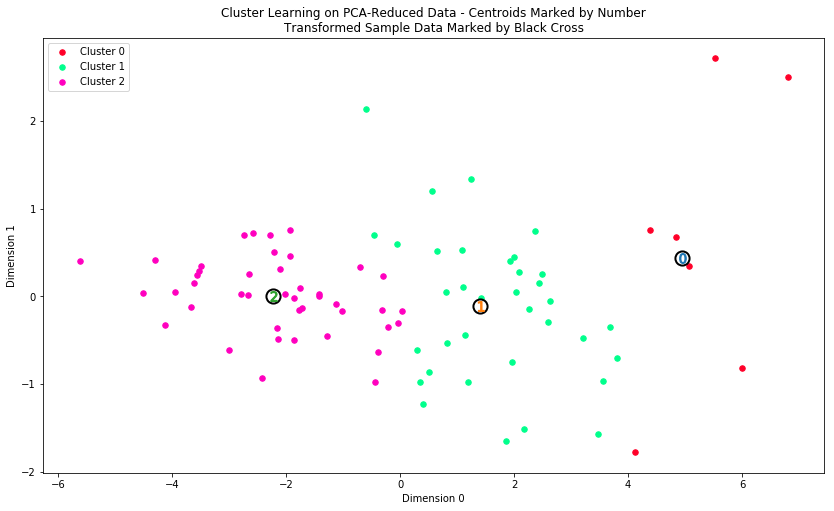

In [296]:
pred_res,center=pred_GM(reduced_year_sales,3)
cluster_res(reduced_year_sales,pred_res,center)

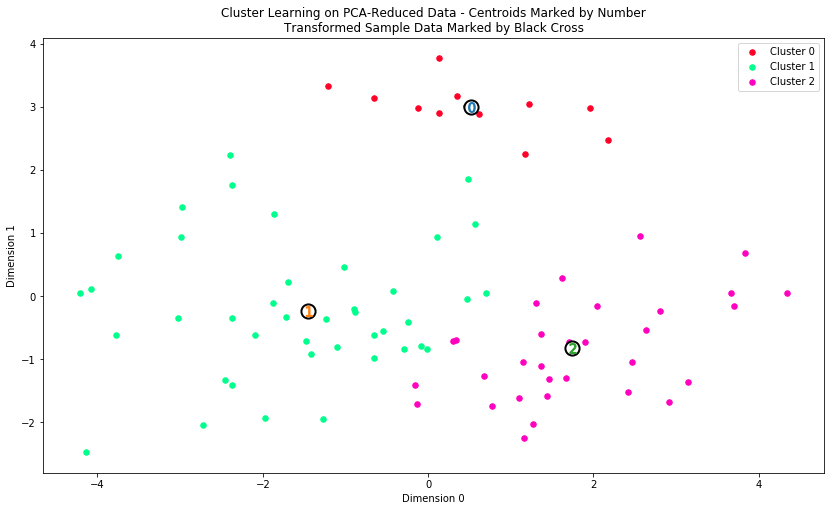

In [297]:
pred_res,center=pred_GM(reduced_perc_sales,3)
cluster_res(reduced_perc_sales,pred_res,center)